# EDA of IPL data

This notebook consist of __data analysis__ for IPL data. This is a project deliverable as part of INSAID GCDAI program, I am enrolled in.

## Data Manual
This manual is provided along with data of IPL matches:

* All Indian Premier League Cricket matches between 2008 and 2016.
* This is the ball by ball data of all the IPL cricket matches till season 9.
* The dataset contains 2 files: deliveries.csv and matches.csv.
* __matches.csv__ contains details related to the match such as location, contesting teams, umpires, results, etc.
* __deliveries.csv__ is the ball-by-ball data of all the IPL matches including data of the batting team, batsman, bowler, non-striker, runs scored, etc.


## Data Loading and Setup
Let us start by importing all the required libraries and set up:

In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline
print("Setup Complete!")

Setup Complete!


Now, we would _import the data_ from CSV downloaded from the provided repository.

In [2]:
matches = pd.read_csv('matches.csv', index_col=['id'])
deliveries = pd.read_csv('deliveries.csv')
print("Data Loading Complete!")

Data Loading Complete!


Let us see some data to get the perspective of data to be analyzed

In [3]:
# Matches Data
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Deliveries Data
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Data Profiling
In this section we would profile the data and prepricess it to remove missing or erroraneous values.

### Understanding of data set
Here will do some processing to understand the data set better

In [5]:
matches.shape

(696, 17)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 1 to 7953
Data columns (total 17 columns):
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(4), object(13)
memory usage: 97.9+ KB


#### Observation
* From the above '_matches.info()_', one can deduce that column __umpire3__ has lots of null values and thus can be __dropped__.
* Most of the columns or data in matches data set is of type object i.e., string. Thus, could be converted to categorical numerical values if required.

In [7]:
matches.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,696.000000,696.000000,696.000000,696.000000
mean,2012.965517,0.027299,13.472701,3.349138
std,3.069266,0.163070,23.607994,3.411398
min,2008.000000,0.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,3.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2018.000000,1.000000,146.000000,10.000000


Looking at the numerical data, everything seems correct. Thus, no more correction is required in this.
Let's do panda profiling too of __matches__ data set, to be sure of.

In [8]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_before_preprocessing.html")
print("Matches Profiling Complete!")

Matches Profiling Complete!


#### Pandas Profiling observations:
* __City__ has 7 missing values, need to see if it can be filled using the venue or team playing.
* There are __too many unique umpires__, need to check for spelling mistakes.
* __date__ column needs to be converted to same format and to _datetime_ type.
* For columns __city, player_of_match, team_1, team_2, toss_winner, venue__, spelling needs to be checked.

In [9]:
deliveries.shape

(164750, 21)

In [10]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164750 entries, 0 to 164749
Data columns (total 21 columns):
match_id            164750 non-null int64
inning              164750 non-null int64
batting_team        164750 non-null object
bowling_team        164750 non-null object
over                164750 non-null int64
ball                164750 non-null int64
batsman             164750 non-null object
non_striker         164750 non-null object
bowler              164750 non-null object
is_super_over       164750 non-null int64
wide_runs           164750 non-null int64
bye_runs            164750 non-null int64
legbye_runs         164750 non-null int64
noball_runs         164750 non-null int64
penalty_runs        164750 non-null int64
batsman_runs        164750 non-null int64
extra_runs          164750 non-null int64
total_runs          164750 non-null int64
player_dismissed    8157 non-null object
dismissal_kind      8157 non-null object
fielder             5918 non-null object
dtype

Looking at the info, data looks fine. Lets now look at the numerical data.

In [11]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000,164750.000000
mean,977.951757,1.482307,10.151879,3.616243,0.000492,0.037184,0.004898,0.021548,0.004200,0.000061,1.237238,0.067891,1.305129
std,2147.671843,0.501592,5.675666,1.807398,0.022168,0.254087,0.115006,0.196410,0.071111,0.017421,1.603511,0.345144,1.596255
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,349.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,521.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,7953.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Numerical data also seems correct. There are few areas to check though like batsman_runs 7 (max), total_runs 10 (max) etc.
Lets go for panda profiling to find out more

In [12]:
profile = pandas_profiling.ProfileReport(deliveries)
profile.to_file(outputfile="deliveries_before_preprocessing.html")
print("Deliveries Profiling Complete!")

Deliveries Profiling Complete!


#### Pandas Profiling observations:
* Extra_runs can be used for other types of runs like wide, no_ball etc.
<table>
    <tr>
        <th>Column</th>
        <th>Zeros %</th>
    </tr>
    <tr>
        <td>bye_runs</td>
        <td>99.7</td>
    </tr>
    <tr>
        <td>legbye_runs</td>
        <td>98.3</td>
    </tr>
    <tr>
        <td>noball_runs</td>
        <td>99.6</td>
    </tr>
    <tr>
        <td>wide_runs</td>
        <td>97.0</td>
    </tr>
</table>
* total_runs is highly corelatted with baatsman_runs, thus, can be removed.
* There are 5 duplicate rows. 
* Check innings value 3 & 4.

In [13]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    156593
dismissal_kind      156593
fielder             158832
dtype: int64

## Data Cleaning
In this section, we would clean both the data set _matches_ and _deliveries_ using the _observations_ in the previous section.

### Dropping unwanted columns
Cleaning would start with dropping of columns from both _matches_ and _deliveries_ data set.
* From __matches__, we would drop column __umpire3__.
* From __deliveries__, we would drop columns __bye_runs, legbye_runs, noball_runs, wide_runs and total_runs__.

In [14]:
# Matches data set
matches = matches.drop(['umpire3'], axis=1)
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [15]:
# Deliveries Data Set
drop_col_list = ['bye_runs', 'legbye_runs', 'noball_runs', 'wide_runs', 'penalty_runs', 'total_runs']
deliveries = deliveries.drop(drop_col_list, axis=1)
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,4,0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,0,2,NaN,NaN,NaN


### Missing Values
City has 7 missing values, let see if it can be filled.


In [16]:
matches[matches.city.isnull()]['venue'].unique()

array(['Dubai International Cricket Stadium'], dtype=object)

__Since there is only one venue, populating the city with 'Dubai'__

In [17]:
matches.city = matches.city.fillna('Dubai')
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

### Changing date to timestamp
Now, we would convert the date data type to timestamp.

In [18]:
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
dtype: object

In [19]:
matches[matches.win_by_wickets != 0]['win_by_runs'].unique()

array([0], dtype=int64)

### Check for spelling mistakes
Suspects if column city, player_of_match, team_1, team_2, toss_winner, venue, umpire1 and umpire2 have spelling mistakes

In [20]:
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

__Bangalore__ and __Bengaluru__ are same. It needs to be corrected.

In [21]:
import regex
def fuzzy_search(content, regex_, error):
    """
        Search the best possible match of 'regex_' in the 'content'.
        The regex would try and match upto the provided error count.
    """
    search = None
    if isinstance(content, str):
        search_regex = '(?e)(' + regex_ + '){e<=' + str(error) + '}'
        result = regex.search(search_regex, content)
        if result:
            if sum(result.fuzzy_counts) == error:
                search = result[1]
    return search

In [22]:

umpires2 = matches.umpire2.unique()
for u in umpires2:
    if isinstance(u, str):
        for temp in umpires2:
            similar = fuzzy_search(temp, u, 2)
            if similar:
                print(f"Searching similar umpire to: {u}")
                print(similar)

Searching similar umpire to: NJ Llong
el Llong
Searching similar umpire to: S Ravi
SJ Davi
Searching similar umpire to: CK Nandan
O Nandan
Searching similar umpire to: AK Chaudhary
il Chaudhary
Searching similar umpire to: VK Sharma
PK Dharma
Searching similar umpire to: VK Sharma
ar Sharma
Searching similar umpire to: CB Gaffaney
is Gaffaney
Searching similar umpire to: RJ Tucker
Rod Tucker
Searching similar umpire to: VA Kulkarni
et Kulkarni
Searching similar umpire to: S Das
S Rav
Searching similar umpire to: S Das
A Des
Searching similar umpire to: S Das
Shas
Searching similar umpire to: S Das
SJ Dav
Searching similar umpire to: S Das
S Haz
Searching similar umpire to: S Das
S As
Searching similar umpire to: S Das
D Des
Searching similar umpire to: S Das
l Dan
Searching similar umpire to: A.D Deshmukh
A Deshmukh
Searching similar umpire to: Rod Tucker
RJ Tucker
Searching similar umpire to: O Nandan
A Nanda 


From above it can be concluded that there are too many errors in the names and thus, no analysis is possible.
__Both columns umpire1 and umpire 2 to be dropped__

In [23]:
players = matches.player_of_match.unique()
for p in players:
    if isinstance(p, str):
        for temp in players:
            similar = fuzzy_search(temp, p, 1)
            if similar:
                print(f"Searching similar players to: {p}")
                print(similar)

Searching similar players to: AR Patel
A Patel
Searching similar players to: B Kumar
y Kumar
Searching similar players to: B Kumar
P Kumar
Searching similar players to: KH Pandya
HH Pandya
Searching similar players to: RG Sharma
R Sharma
Searching similar players to: DR Smith
D Smith
Searching similar players to: YK Pathan
IK Pathan
Searching similar players to: IK Pathan
YK Pathan
Searching similar players to: A Mishra
D Mishra
Searching similar players to: P Kumar
B Kumar
Searching similar players to: P Kumar
y Kumar
Searching similar players to: A Singh
j Singh
Searching similar players to: A Singh
P Singh
Searching similar players to: A Singh
n Singh
Searching similar players to: A Singh
t Singh
Searching similar players to: A Singh
p Singh
Searching similar players to: I Sharma
p Sharma
Searching similar players to: I Sharma
G Sharma
Searching similar players to: I Sharma
M Sharma
Searching similar players to: I Sharma
V Sharma
Searching similar players to: I Sharma
R Sharma
Searc

There seems ambiguity in this data like RG Sharma and R Sharma could be same, Z Khan and d Khan could be same.
However, __nothing could be conluded for sure__. 

In [24]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [25]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype=object)

In [26]:
matches.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [27]:
deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

__'Rising Pune Supergiant' and 'Rising Pune Supergiants' both are same team.__
Need to be corrected for all __team__ columns.

In [28]:
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

__'Punjab Cricket Association IS Bindra Stadium, Mohali' is same as 'Punjab Cricket Association Stadium, Mohali'.__

In [29]:
# Let us correct Bangalore to Bengaluru
def city_name(name):
    if name == 'Bangalore':
        return 'Bengaluru'
    else:
        return name

matches.city = matches.city.apply(city_name)
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [30]:
# Dropping columns umpire1 and and umpire2
matches = matches.drop(['umpire1', 'umpire2'], axis=1)
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [31]:
# Correcting 'Rising Pune Supergiant' to 'Rising Pune Supergiants'
def team_name(name):
    if name == 'Rising Pune Supergiant':
        return 'Rising Pune Supergiants'
    else:
        return name

matches.team1, matches.team2, matches.toss_winner, matches.winner = matches.team1.apply(team_name), matches.team2.apply(team_name), matches.toss_winner.apply(team_name), matches.winner.apply(team_name)
print(matches.team1.unique())
print(matches.team2.unique())
print(matches.toss_winner.unique())
print(matches.winner.unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala']
['Royal Challengers Bangalore' 'Rising Pune Supergiants'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors']
['Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Daredevils' 'Gujarat Lion

In [32]:
deliveries.batting_team = deliveries.batting_team.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
deliveries.bowling_team = deliveries.bowling_team.replace('Rising Pune Supergiant', 'Rising Pune Supergiants')
print(deliveries.batting_team.unique())
print(deliveries.bowling_team.unique())

['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiants' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors']
['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiants' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [33]:
matches.venue = matches.venue.replace('Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali')
matches.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Sawai Mansingh Stadium',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSC

## Remove Duplicates
From _deliveries_, 5 duplicated rows to be removed

In [34]:
deliveries[deliveries.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,1,0,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,4,0,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,1,0,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,0,0,NaN,NaN,NaN


In [35]:
deliveries = deliveries.drop_duplicates()
deliveries[deliveries.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder


In [36]:
deliveries[deliveries.inning == 3].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder
8092,34,3,Mumbai Indians,Gujarat Lions,1,1,JC Buttler,KA Pollard,JP Faulkner,1,1,0,NaN,NaN,NaN
8093,34,3,Mumbai Indians,Gujarat Lions,1,2,KA Pollard,JC Buttler,JP Faulkner,1,4,0,NaN,NaN,NaN
8094,34,3,Mumbai Indians,Gujarat Lions,1,3,KA Pollard,JC Buttler,JP Faulkner,1,6,0,NaN,NaN,NaN
8095,34,3,Mumbai Indians,Gujarat Lions,1,4,KA Pollard,JC Buttler,JP Faulkner,1,0,0,KA Pollard,caught,AJ Finch
8096,34,3,Mumbai Indians,Gujarat Lions,1,5,JC Buttler,RG Sharma,JP Faulkner,1,0,0,JC Buttler,caught,Ishan Kishan


Innings 3 and 4 are those innings in which is_super_over is 1. Thus, it is correct.

__Cleaning process is complete.__

Lets confirm the same by panda profiling.

In [37]:
profile = pandas_profiling.ProfileReport(matches)
profile.to_file(outputfile="matches_after_preprocessing.html")
profile1 = pandas_profiling.ProfileReport(deliveries)
profile1.to_file(outputfile="deliveries_after_preprocessing.html")
print("After Cleaning Profiling Complete!")

After Cleaning Profiling Complete!


## Identification of relationships
In this section we will identify the relationship between different data variables.

For __Matches__: Converting categorical data into numerical data.

In [38]:
# Lets make a copy of the matches data so that we can have both categorical and numerical data to analyze
matches_num = matches.copy()
team_dict = {
    'Sunrisers Hyderabad': 11,
    'Royal Challengers Bangalore': 12,
    'Mumbai Indians': 13,
    'Rising Pune Supergiants': 14,
    'Gujarat Lions': 15,
    'Kolkata Knight Riders': 16,
    'Kings XI Punjab': 17,
    'Delhi Daredevils': 18,
    'Chennai Super Kings': 19,
    'Rajasthan Royals': 20,
    'Deccan Chargers': 21,
    'Kochi Tuskers Kerala': 22,
    'Pune Warriors': 23
}

team_num_dict = {
    'team1': team_dict,
    'team2': team_dict,
    'toss_winner': team_dict,
    'winner': team_dict
}

matches_num.replace(team_num_dict, inplace=True)
matches_num.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,11,12,12,field,normal,0,11.0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,13,14,14,field,normal,0,14.0,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,15,16,16,field,normal,0,16.0,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,14,17,17,field,normal,0,17.0,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bengaluru,2017-04-08,12,18,12,bat,normal,0,12.0,15,0,KM Jadhav,M Chinnaswamy Stadium


In [39]:
matches_num.winner.fillna(0, inplace=True)

In [40]:
matches_num.winner = matches_num.winner.astype('int64')
matches_num.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,11,12,12,field,normal,0,11,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,13,14,14,field,normal,0,14,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,15,16,16,field,normal,0,16,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,14,17,17,field,normal,0,17,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bengaluru,2017-04-08,12,18,12,bat,normal,0,12,15,0,KM Jadhav,M Chinnaswamy Stadium


In [41]:
toss_result_dict = {
    'toss_decision': {'field': 0, 'bat': 1},
    'result': {'normal': 1, 'tie': 0, 'no result': -1}
}
matches_num.replace(toss_result_dict, inplace=True)
matches_num.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,11,12,12,0,1,0,11,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,2017-04-06,13,14,14,0,1,0,14,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,2017-04-07,15,16,16,0,1,0,16,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,2017-04-08,14,17,17,0,1,0,17,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bengaluru,2017-04-08,12,18,12,1,1,0,12,15,0,KM Jadhav,M Chinnaswamy Stadium


_'matches'_ data set is converted to numerical values _'matches_num'_

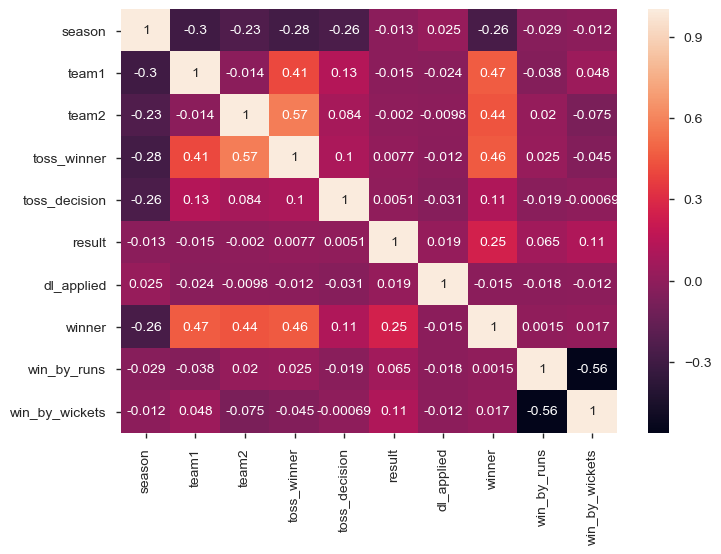

In [42]:
# Lets see the corrleation of this data set to find relationships
sns.heatmap(matches_num.corr(), annot=True)

#### Relationships identified
* It seems as season progressed, winning by runs increased.
* toss winner has a positive corrleation with winner.

In [43]:
# Similary lets convert deliveries data set and plot the heat map
deliveries_num = deliveries.copy()

del_team_dict = {
    'batting_team': team_dict,
    'bowling_team': team_dict
}
deliveries_num.replace(del_team_dict, inplace=True)
deliveries_num.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder
0,1,1,11,12,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
1,1,1,11,12,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
2,1,1,11,12,1,3,DA Warner,S Dhawan,TS Mills,0,4,0,NaN,NaN,NaN
3,1,1,11,12,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,NaN,NaN,NaN
4,1,1,11,12,1,5,DA Warner,S Dhawan,TS Mills,0,0,2,NaN,NaN,NaN


In [44]:
import numpy as np

deliveries_num.player_dismissed.fillna('unknown', inplace=True)
def player_dismiss_cat(player_dismissed):
    if player_dismissed == 'unknown':
        return 0
    else:
        return 1

deliveries_num['wicket'] = deliveries_num.player_dismissed.apply(player_dismiss_cat)
deliveries_num.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,batsman_runs,extra_runs,player_dismissed,dismissal_kind,fielder,wicket
0,1,1,11,12,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,unknown,NaN,NaN,0
1,1,1,11,12,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,unknown,NaN,NaN,0
2,1,1,11,12,1,3,DA Warner,S Dhawan,TS Mills,0,4,0,unknown,NaN,NaN,0
3,1,1,11,12,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,unknown,NaN,NaN,0
4,1,1,11,12,1,5,DA Warner,S Dhawan,TS Mills,0,0,2,unknown,NaN,NaN,0


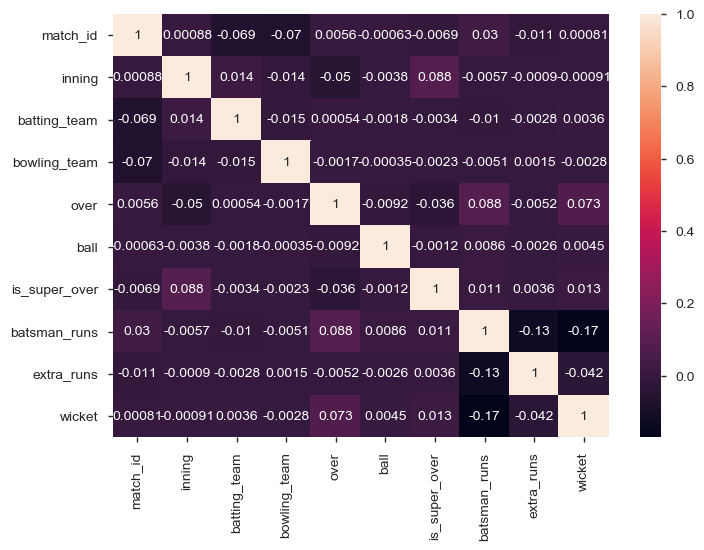

In [45]:
# Lets see the corrleation of this data set to find relationships
sns.heatmap(deliveries_num.corr(), annot=True)

#### Relationships identified
* Wickets fall more often in last part of ininings and also, most runs are scored.
* Batsman runs fall off as soon as wickets fall

## Analyzing through questions
In this section we would analyze data sets through different questions

### Which player got the maximum player of the match award
Everyone is eager to know the most valuable player till now.

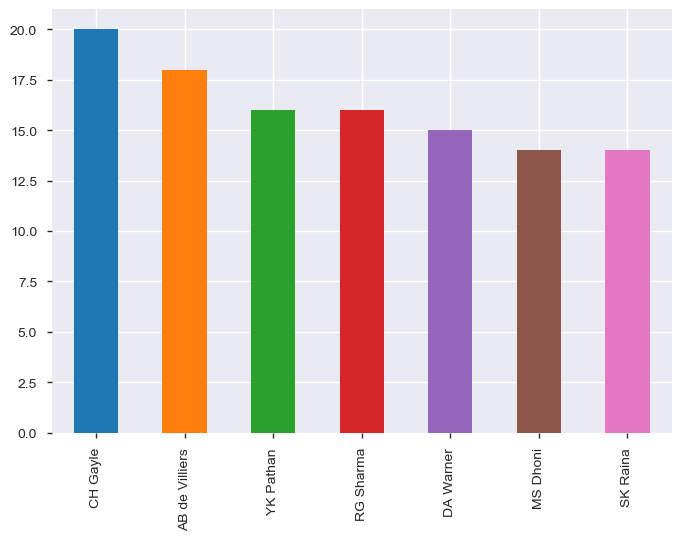

In [46]:
# plt.subplots(figsize=(10,10))
matches_num["player_of_match"].value_counts().head(7).plot.bar()

#### Answers
* __A-01__: Chris Gayle, AB De Villiers and Rohit Sharma are the most valuable players till now.

### Which team has won by maximum runs?

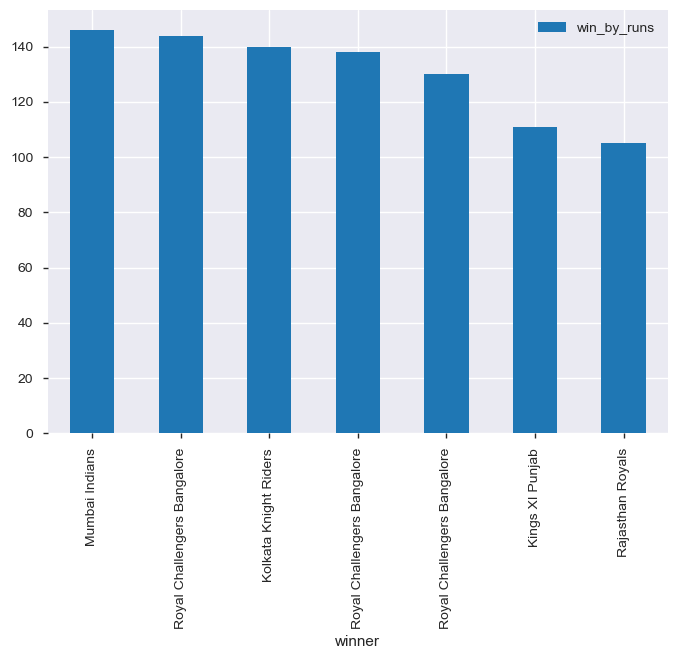

In [47]:
most_by_runs = matches[['winner', 'win_by_runs']].sort_values(by=['win_by_runs'], ascending=False)
most_by_runs.head(n=7).plot.bar(x='winner', stacked=True)

#### Answers
* __A-02__: Mumbai Indians is the team which has won by maximum runs

### Which team has won by maximum wickets?

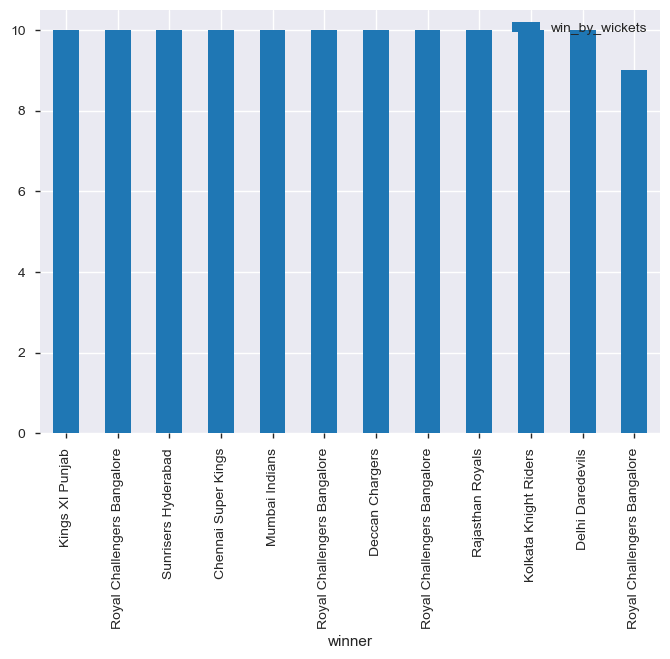

In [48]:
most_by_wickets = matches[['winner', 'win_by_wickets']].sort_values(by=['win_by_wickets'], ascending=False)
most_by_wickets.head(n=12).plot.bar(x='winner', stacked=True)

#### Answers
* __A-03__: There are 11 Teams (Royal Challengers Banglore, Kings XI Punjab etc) which has won by 10 wickets.

### Which teams are most successful in IPL?

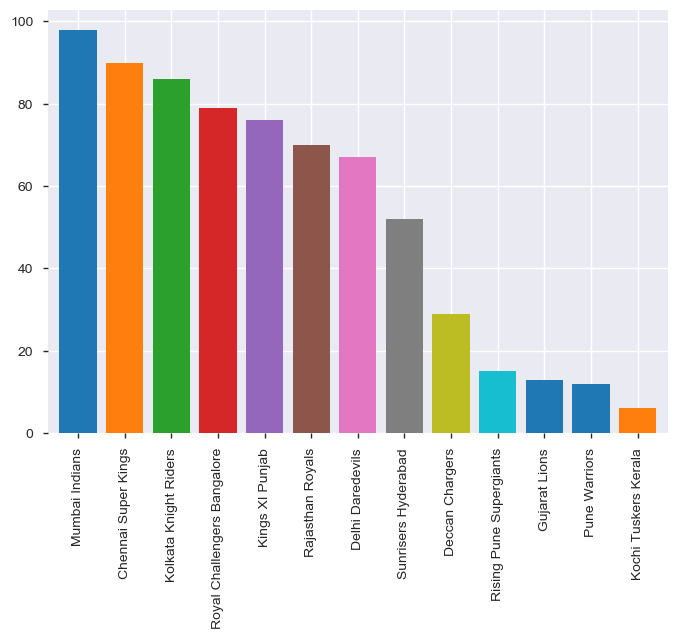

In [49]:
matches[matches['winner'] != 0]['winner'].value_counts().plot.bar(width=0.8)
plt.show()

#### Answers
* __A-04__: Mumbai Indians and Chennai Super Kings are the most succesful team in the IPL history

### Which IPL season(s) were played in maximum number of cities?

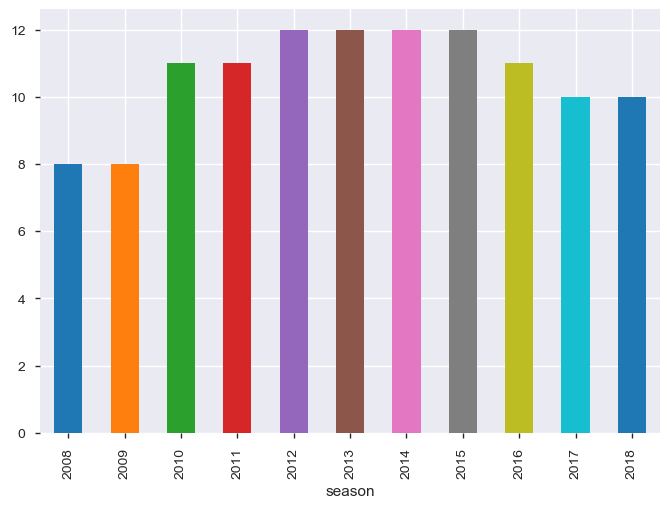

In [50]:
matches_num.groupby('season')['city'].nunique().plot(kind='bar')

#### Answers
* __A-05__: From 2012 to 2015, there were most number of cities on which matches were played 

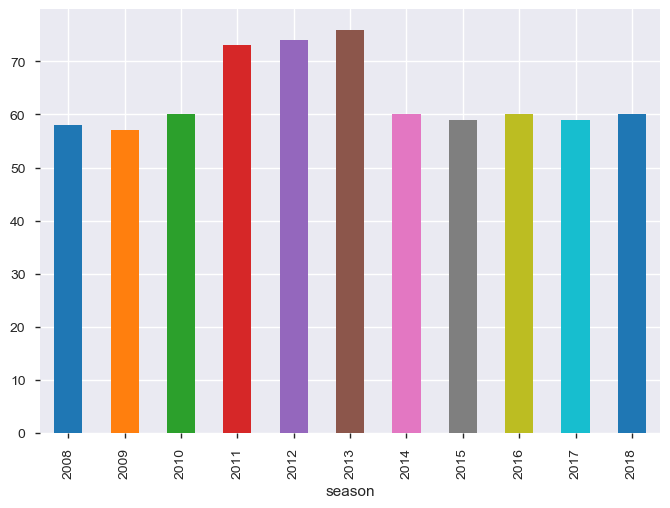

In [51]:
matches_num.groupby('season')['winner'].count().plot.bar()

#### Answers
* __A-06__: 2013 was the IPL season when maximun number of matches were played.

### Does winning the toss increases chances of winning too?

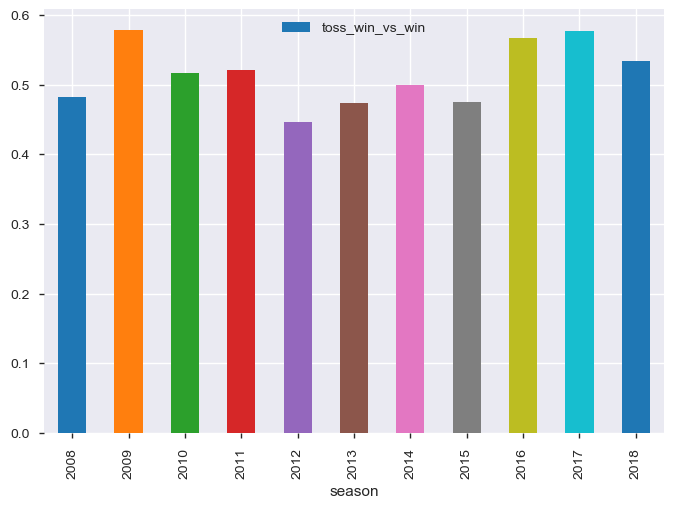

In [52]:
from collections import defaultdict

season_toss_win_per_dict = defaultdict(list)
season_group = matches_num.groupby('season')
for season, group in season_group: 
    season_toss_win_per_dict['season'].append(season)
    toss_win_vs_win = group[group.toss_winner == group.winner].shape[0]/group.shape[0]
    season_toss_win_per_dict['toss_win_vs_win'].append(toss_win_vs_win)
season_toss_win_per_df = pd.DataFrame(season_toss_win_per_dict)
season_toss_win_per_df.plot.bar(x='season', y='toss_win_vs_win')

#### Answers
* __A-07__: Baring 4 seasons 2008, 2012, 2013 and 2015, teams have won more who have won the toss.
__Thus, it can be concluded that team winning the toss have a higher chance to win the game__

### Which team(s) does not depend on toss for a win?

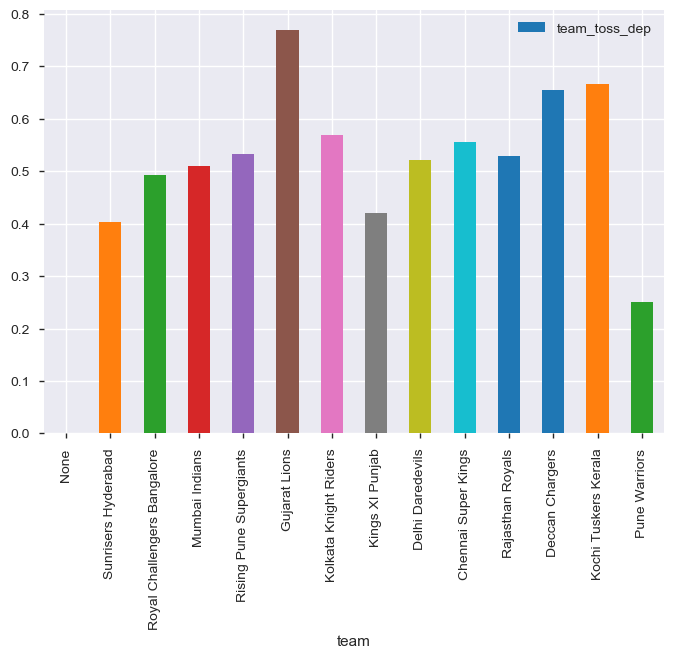

In [53]:
team_inverted_dict = {value: key for key, value in team_dict.items()}
team_toss_dep_dict = defaultdict(list)

team_group = matches_num.groupby('winner')
for team, group in team_group: 
    team_toss_dep_dict['team'].append(team_inverted_dict.get(team))
    team_toss_dep = group[group.toss_winner == team].shape[0]/group.shape[0]
    team_toss_dep_dict['team_toss_dep'].append(team_toss_dep)
team_toss_dep_df = pd.DataFrame(team_toss_dep_dict)
team_toss_dep_df.plot.bar(x='team', y='team_toss_dep')

#### Answers
* __A-08__: It pretty much shows the same picture as sesons of IPL. However, teams _Sunrisers Hyderabad_, _Kings XI Punjab_ and _Pune Warriors_ do not depend on toss much.

### Analyze which team is better between MI and CSK?

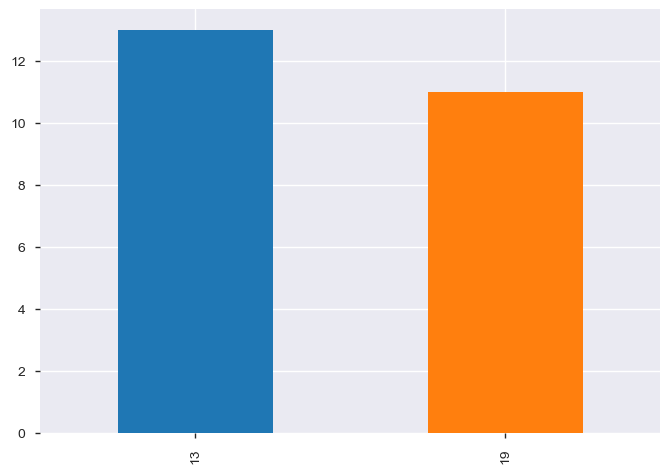

In [54]:
mi_csk_h2h = matches_num[((matches_num.team1 == 13) & (matches_num.team2 == 19)) | ((matches_num.team1 == 19) & (matches_num.team2 == 13))]
mi_csk_group = mi_csk_h2h.groupby('season')

mi_csk_h2h[['season', 'winner']]['winner'].value_counts().plot.bar()

#### Answers
* __A-09__: Overall, Mumbai Indians have won more matches than Chennai Super Kings when playing with each other

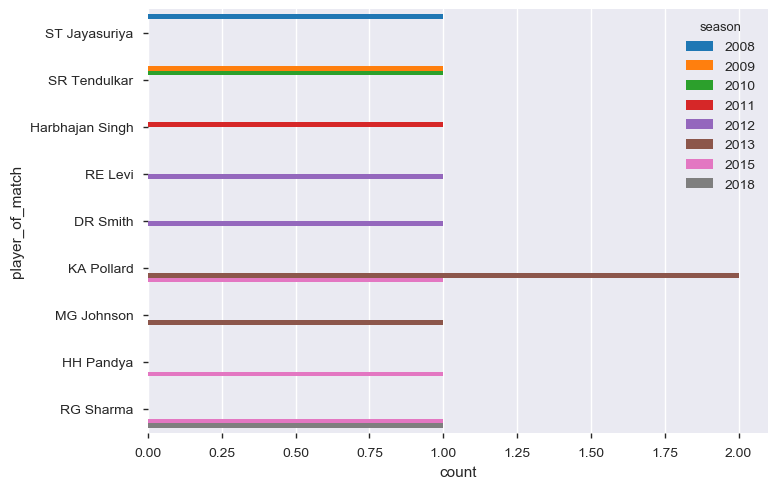

In [55]:
win_mi_csk_grp = mi_csk_h2h.groupby('winner')
mi_win = win_mi_csk_grp.get_group(13)
sns.countplot(data=mi_win,
                  y = 'player_of_match',
                  hue = 'season',
                 saturation=1)

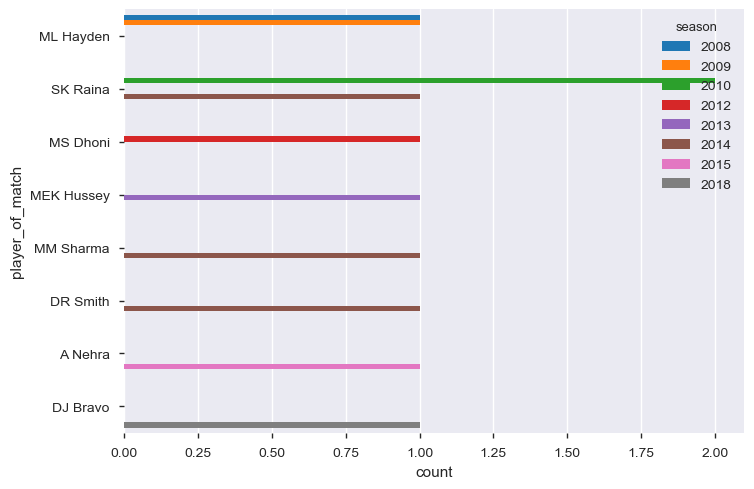

In [56]:
csk_win = win_mi_csk_grp.get_group(19)
sns.countplot(data=csk_win,
                  y = 'player_of_match',
                  hue = 'season',
                 saturation=1)

#### Answers
__A-10__: From the above two plots, it can be conluded that
* For _MI_, top performer in CSK games are Sachin Tendulkar, Keroin Pollard and Rohit Sharma
* For _CSK_, top performer in MI games are Mathew Hayden and Suresh Raina

### Which team(s) likes to bat first or bowl first?

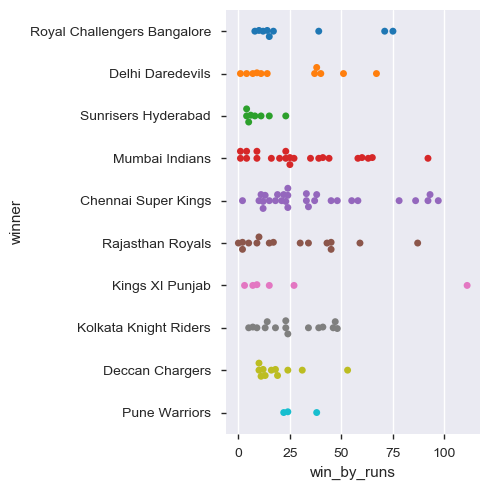

In [57]:
toss_result_grp = matches[matches.winner != 0].groupby('toss_decision')
batting_first = toss_result_grp.get_group('bat')
batting_first = batting_first[batting_first.toss_winner == batting_first.winner]
sns.catplot(x="win_by_runs", y="winner", kind="swarm", data=batting_first)
# batting_first

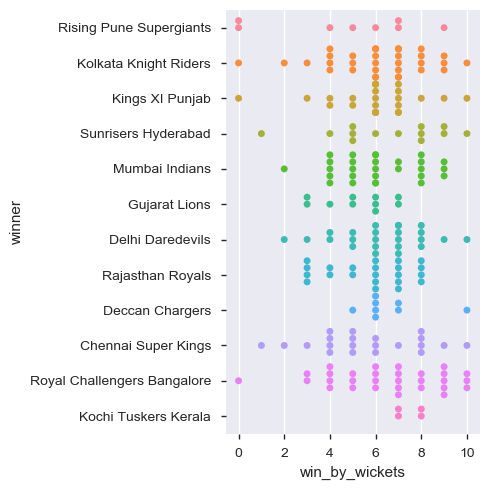

In [58]:
bowling_first = toss_result_grp.get_group('field')
bowling_first = bowling_first[bowling_first.toss_winner == bowling_first.winner]
sns.catplot(x="win_by_wickets", y="winner", kind="swarm", data=bowling_first)

#### Answers
__A-11__: Following can be confirmed from the above plots:
* __Chennai Super Kings__ likes to bat first and wins most of the games like that.
* __Mumbai Indians and Royal Challengers Banglore__ like to field first and chase.

### Analyze corrleation between season and win_by_runs or win_by_wickets

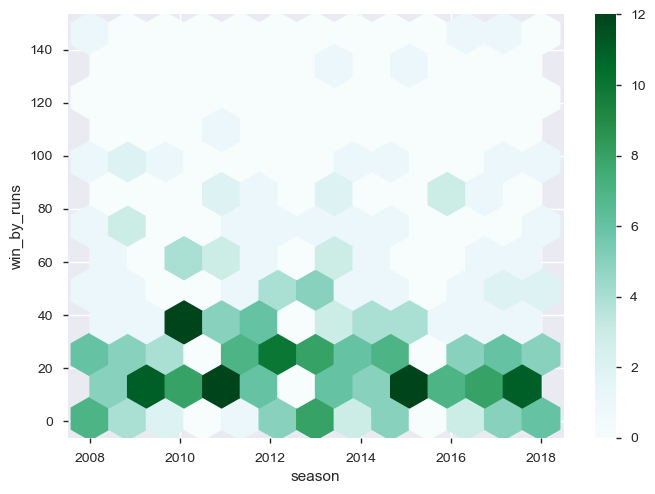

In [59]:
matches[matches.win_by_runs > 0].plot.hexbin(x='season', y='win_by_runs', gridsize=12)

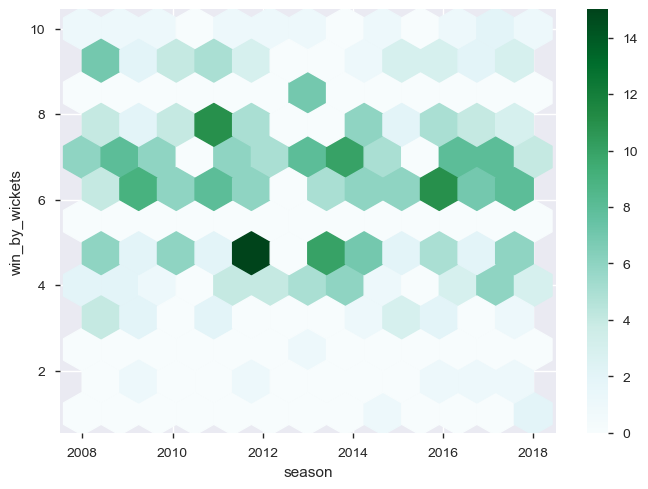

In [60]:
matches[matches.win_by_wickets > 0].plot.hexbin(x='season', y='win_by_wickets', gridsize=12)

#### Answers
__A-12__: From the above plots, following can be concluded:
* In IPL, most of the time batting team won by 40 runs or less.
* In 2010 most of the time batting team won by 40 runs and around.
* In 2011 and 2015 most of the time batting team won by 10 runs and around.
* In IPL, most of the time bowling team won by 5 wickets or more.
* In 2012, most of the bowling team won by 5 wickets and around.

### What is the most common mode of dismissal in IPL?

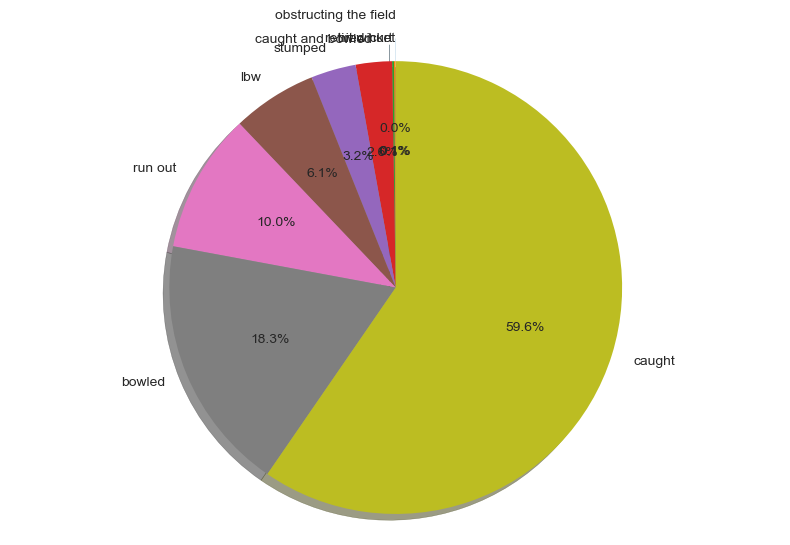

In [61]:
deliveries_num.dismissal_kind = deliveries_num.dismissal_kind.fillna('NA')
ball_df = deliveries_num[deliveries_num['dismissal_kind']  != 'NA']
agg = ball_df['dismissal_kind'].value_counts()[:9]

labels = list(reversed(list(agg.index )))
values = list(reversed(list(agg.values)))

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### Answers
* __A-13__: Most common dissmissal kind for the batsman is __caught__

### Who are the top run scoreres in IPL?

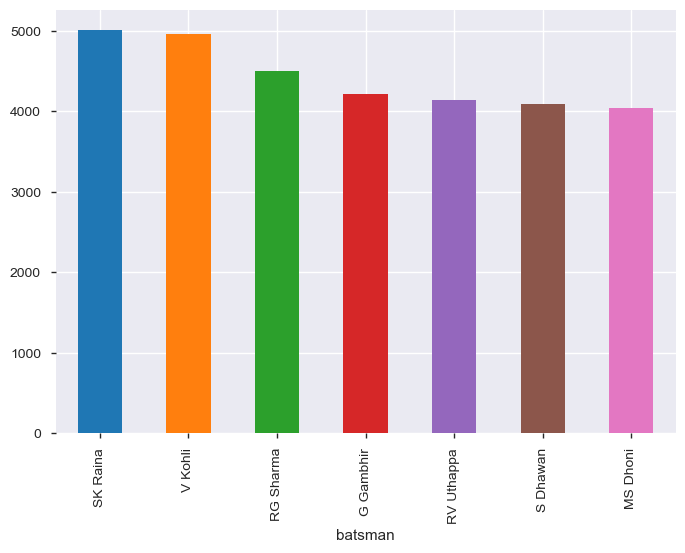

In [62]:
batsman_group = deliveries_num.groupby('batsman')
batsman_group.batsman_runs.sum().sort_values(ascending=False).head(n=7).plot.bar()

#### Answers
* __A-14__: Top 3 run getters in IPL are '_SK Raina_', '_V Kohli_' and '_Rohit Sharma_'.

### Analyze Rohit Sharma performance in IPL?

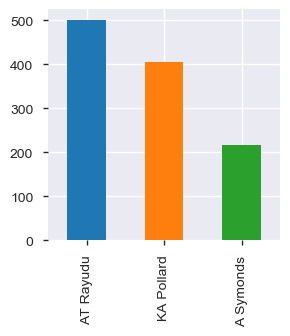

In [63]:
rohit_sharma = batsman_group.get_group('RG Sharma')
plt.figure(figsize=(3,3))
rohit_sharma.non_striker.value_counts().head(n=3).plot.bar()

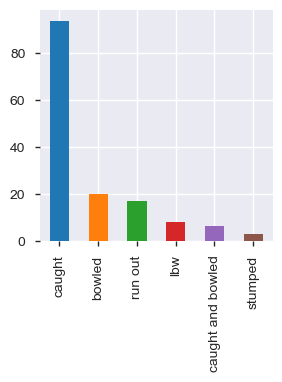

In [64]:
plt.figure(figsize=(3,3))
rohit_sharma[rohit_sharma.dismissal_kind != 'NA'].dismissal_kind.value_counts().plot.bar()

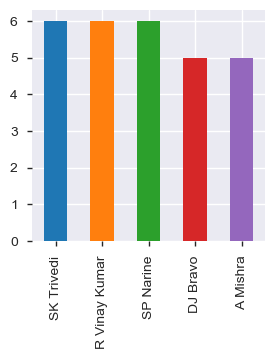

In [65]:
plt.figure(figsize=(3,3))
rohit_sharma[rohit_sharma.dismissal_kind != 'NA'].bowler.value_counts().head(n=5).plot.bar()

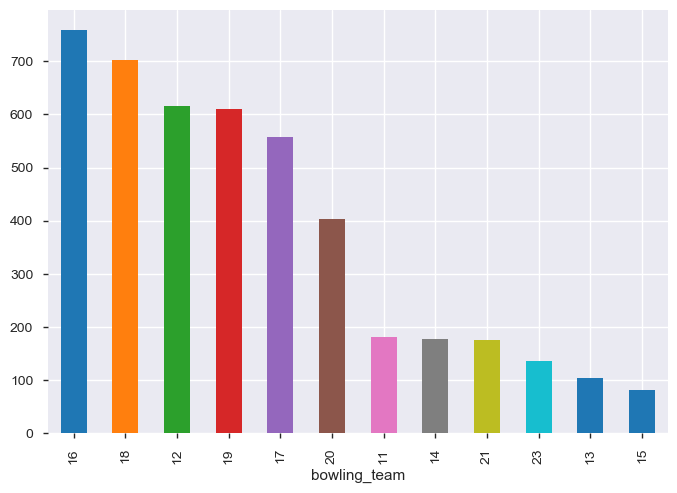

In [66]:
rohit_sharma_bowling_team = rohit_sharma.groupby('bowling_team')
rohit_sharma_bowling_team.batsman_runs.sum().sort_values(ascending=False).plot.bar()

#### Answers
__A-15__: Rohit Sharma IPL analyis:
* Most batted with Ambati Rayudu, KA Pollard and A Symonds
* Most common dismissals are caught, bowled and run out.
* Most threatning bowlers to him are SK Trivedi, SP Narine and Vinay Kumar
* Scores most runs against KKR, DD and RCB

### Who are the top wicket takers in IPL?

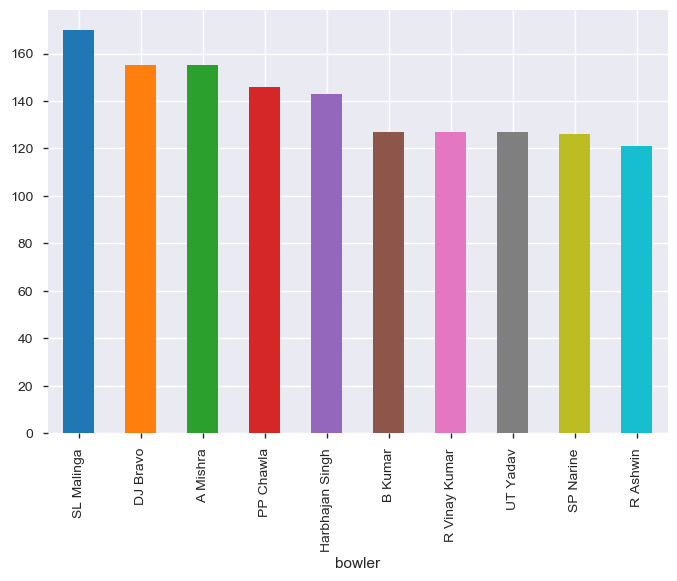

In [67]:
bowler_group = deliveries_num.groupby('bowler')
bowler_group.wicket.sum().sort_values(ascending=False).head(n=10).plot.bar()

#### Answers
* __A-16__: Top 3 wicket takers in IPL are '_SL Malinga_', '_DJ Bravo_' and '_A Mishra_'.

### Analyze correlation between over and wickets or boundaries

In [68]:
dismissal_kind_dict = {
    'NA': -1,
    'caught': 1,
    'bowled': 2,
    'run out': 3,
    'lbw': 4,
    'caught and bowled': 5,
    'stumped': 6,
    'retired hurt': 7,
    'hit wicket': 8,
    'obstructing the field': 9
}
deliveries_num.replace({'dismissal_kind': dismissal_kind_dict}, inplace=True)

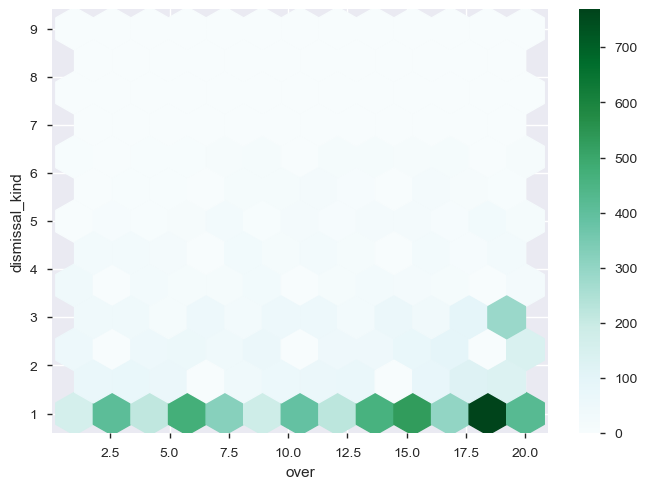

In [69]:
deliveries_num[deliveries_num.wicket == 1].plot.hexbin(x='over', y='dismissal_kind', gridsize=12)

#### Answers
* __A-17__: Most of the wickets fall between 13 to 20 overs.

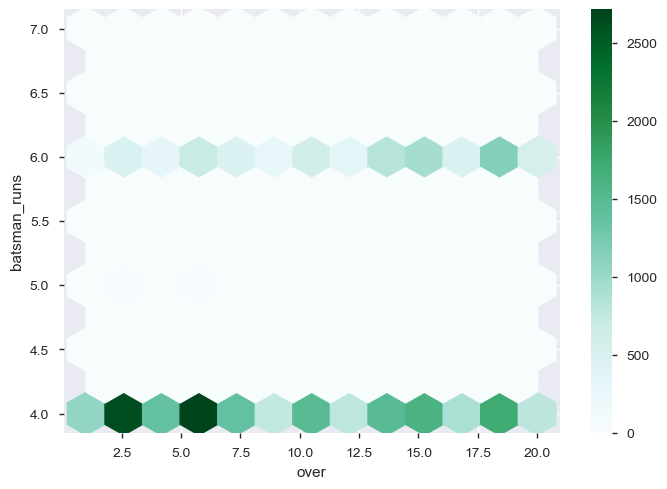

In [70]:
deliveries_num[deliveries_num.batsman_runs > 3].plot.hexbin(x='over', y='batsman_runs', gridsize=12)

#### Answers
__A-18__: Most of the fours comes in the powerplay i.e., 1-6 overs and sixes comes at end of innings i.e., 15-20 overs.

### Which team(s) scores most runs in IPL and take most wickets?

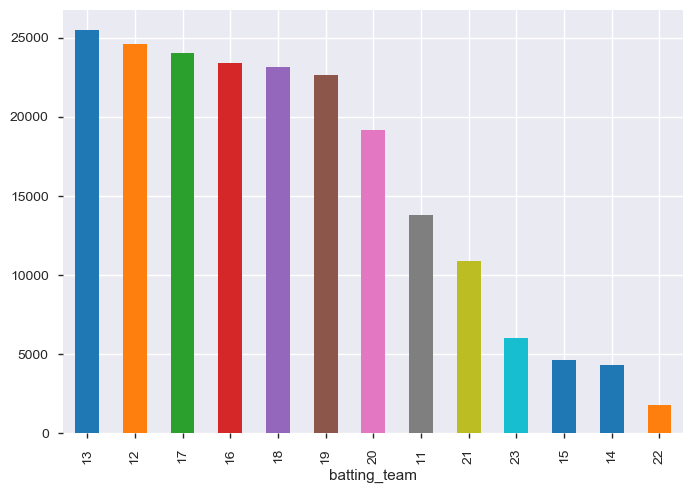

In [75]:
batting_team = deliveries_num.groupby('batting_team')
batting_team.batsman_runs.sum().sort_values(ascending=False).plot.bar()

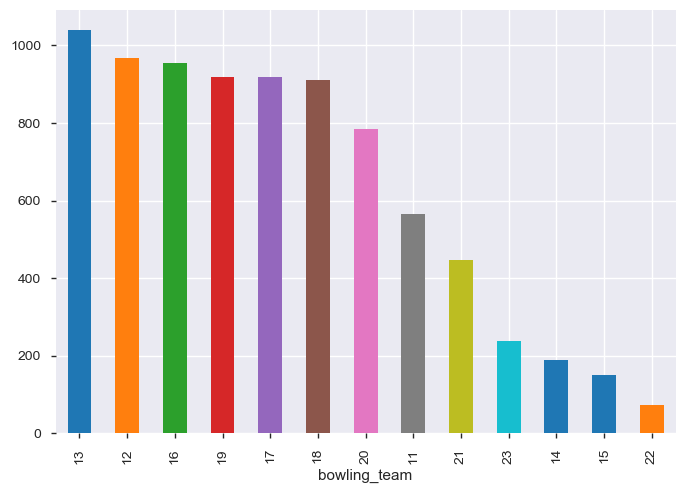

In [76]:
bowling_team = deliveries_num.groupby('bowling_team')
bowling_team.wicket.sum().sort_values(ascending=False).plot.bar()

#### Answers
__A-19__: _Mumbai Indians_ scores most of the runs and takes most of the wickets in IPL. Suprisingly, next best team in both departments is _Royal Challengers Banglore_.

## Conclusion
* __Chris Gayle, AB De Villiers and Rohit Sharma__ are the most valuable players till now.
* __Mumbai Indians__ is the team which has won by _maximum runs_
* There are 11 Teams (Royal Challengers Banglore, Kings XI Punjab etc) which has _won by 10 wickets_.
* __Mumbai Indians and Chennai Super Kings__ are the most succesful team in the IPL history.
* __From 2012 to 2015__, there were _most number of cities_ on which matches were played.
* __2013__ was the IPL season when _maximun number of matches_ were played.
* Baring 4 seasons 2008, 2012, 2013 and 2015, teams have won more who have won the toss. __Thus, it can be concluded that team winning the toss have a higher chance to win the game__.
* __Sunrisers Hyderabad, Kings XI Punjab and Pune Warriors do not depend on toss much__.
* Overall, _Mumbai Indians_ have won _more matches_ than Chennai Super Kings when playing with each other.
* For MI, _top performer_ in CSK games are __Sachin Tendulkar, Keroin Pollard and Rohit Sharma__.
* For CSK, _top performer_ in MI games are __Mathew Hayden and Suresh Raina__.
* __Chennai Super Kings likes to bat first and wins most of the games like that__.
* __Mumbai Indians and Royal Challengers Banglore like to field first and chase__.
* __In IPL, most of the time batting team won by 40 runs or less__.
* In 2010 most of the time batting team won by 40 runs and around.
* In 2011 and 2015 most of the time batting team won by 10 runs and around.
* In IPL, most of the time bowling team won by 5 wickets or more.
* __In 2012, most of the bowling team won by 5 wickets and around__.
* Most __common dissmissal kind__ for the batsman is __caught__.
* Top 3 __run scorer__ in IPL are __'SK Raina', 'V Kohli' and 'Rohit Sharma'.__
* Rohit Sharma Analysis
** Most batted with Ambati Rayudu, KA Pollard and A Symonds
** Most common dismissals are caught, bowled and run out.
** Most threatning bowlers to him are SK Trivedi, SP Narine and Vinay Kumar
** Scores most runs against KKR, DD and RCB
* Top 3 __wicket takers__ in IPL are __'SL Malinga', 'DJ Bravo' and 'A Mishra'__.
* Most of the wickets fall between 13 to 20 overs.
* Most of the fours comes in the powerplay i.e., 1-6 overs and sixes comes at end of innings i.e., 15-20 overs.
* Mumbai Indians scores most of the runs and takes most of the wickets in IPL. Suprisingly, next best team in both departments is Royal Challengers Banglore.